<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./15_s5p_tropomi_co.ipynb"><< 15 - S5P TROPOMI CO </a><span style="float:right;"><a href="./31_geff_data_overview.ipynb">31 - GEFF Data Overview >></a></span>

# Copernicus Atmosphere Monitoring Service (CAMS) GFAS data

The Copernicus Atmopshere Monitoring Service (CAMS) provides consistent and quality-controlled information related to air pollution and health and greenhouse gases. CAMS data consist of `global forecasts and analyses`, `global reanalyses`, `fire emissions` and `greenhouse gas flux inversions`.

#### Module outline:
* [1 - Load, browse and plot CAMS fire emissions data](#cams_gfas)


#### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [2]:
from ipynb.fs.full.functions import visualize_pcolormesh

<hr>

## <a id="cams_gfas"></a>Load, browse and plot CAMS fire emissions data

### Open a CAMS GFAS netCDF file with `xarray`

CAMS GFAS fire emission data can be retrieved in either `GRIB` or `NetCDF` format. With the Python library `xarray` and the `open_dataset` function, we can easily read a single `NetCDF` file.

CAMS GFAS fire emission data are three dimensional data, with the dimensions `latitude`, `longitude` and `time`. The data file loaded has three time steps, from 22 September to 24 September 2019 and a global spatial coverage. The xarray dataset contains a data variable called `frpfire`.

In [3]:
gfas_frpfire_xr = xr.open_dataset('./eodata/cams/gfas/2019/10/20191022-24_gfas_radiative_power.nc')
gfas_frpfire_xr

<xarray.Dataset>
Dimensions:    (latitude: 1800, longitude: 3599, time: 3)
Coordinates:
  * longitude  (longitude) float32 -179.95 -179.85 -179.75 ... 179.75 179.85
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Data variables:
    frpfire    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-10-09 09:34:26 GMT by grib_to_netcdf-2.13.0: grib_to_n...

We can select the data variable with `[]`, which gives us acces to the DataArray and more parameter attributes. Thus, the dataset values are `wildfire radiative power` and the parameter unit is `W m**-2`.

In [4]:
frpfire = gfas_frpfire_xr['frpfire']
frpfire

<xarray.DataArray 'frpfire' (time: 3, latitude: 1800, longitude: 3599)>
[19434600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.95 -179.85 -179.75 ... 179.75 179.85
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

With xarray's `where` function, we can build a geographical subset. Let's define a bounding box for south-east asia `[30,160,-20,80]` and subset the data. We see that the data has a negative _FillValue. Thus a next step is to filter negative values and set them to NaN.

In [5]:
latmin=-20
latmax=30
lonmin=80
lonmax=160
frpfire_subset = frpfire.where((frpfire.latitude < latmax) & (frpfire.latitude > latmin) & (frpfire.longitude < lonmax) & (frpfire.longitude > lonmin),drop=True)
frpfire_subset

<xarray.DataArray 'frpfire' (time: 3, latitude: 500, longitude: 800)>
array([[[-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        ...,
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06]],

       [[-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        ...,
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06]],

       [[-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        ...,
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06],
        [-1.9073486e-06, -1.9073486e-06, -1.9073486e-06, ...,
         -1.9073486e-06, -1.9073486e-06, -1.9073486e-06]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 80.05 80.15 80.25 ... 159.75 159.85 159.95
  * latitude   (latitude) float32 29.95 29.85 29.75 ... -19.75 -19.85 -19.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

In [6]:
frpfire_subset.values[frpfire_subset.values<0]=np.nan
frpfire_subset

<xarray.DataArray 'frpfire' (time: 3, latitude: 500, longitude: 800)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 80.05 80.15 80.25 ... 159.75 159.85 159.95
  * latitude   (latitude) float32 29.95 29.85 29.75 ... -19.75 -19.85 -19.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

### Visualize CAMS GFAS fire emissions data

You can use the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh) again. This time, you should set a logarithmic color scaling with setting `log_scale=True`. 
With `matplotlib.colors.ListedColorMap`, you can specify an individual color scale. Let's call the color scale `cmap` and plot the fire emissions data. Alternatively, you can use the predefine color scale `hot`.

In [7]:
cmap = matplotlib.colors.ListedColormap(['#330305','#620103','#880105','#B00602','#DA0302','#FF0907','#FD3304','#FF3106', 
                                  '#FF5A02', '#FC8706','#FDB004','#FADD02','#FFFF0C','#FEFF47','#FFFE85','#FFFEC5',
                                  '#FFFFFF'])

In [8]:
unit = frpfire.units
longname= frpfire.long_name

(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fa4ab8c4470>)

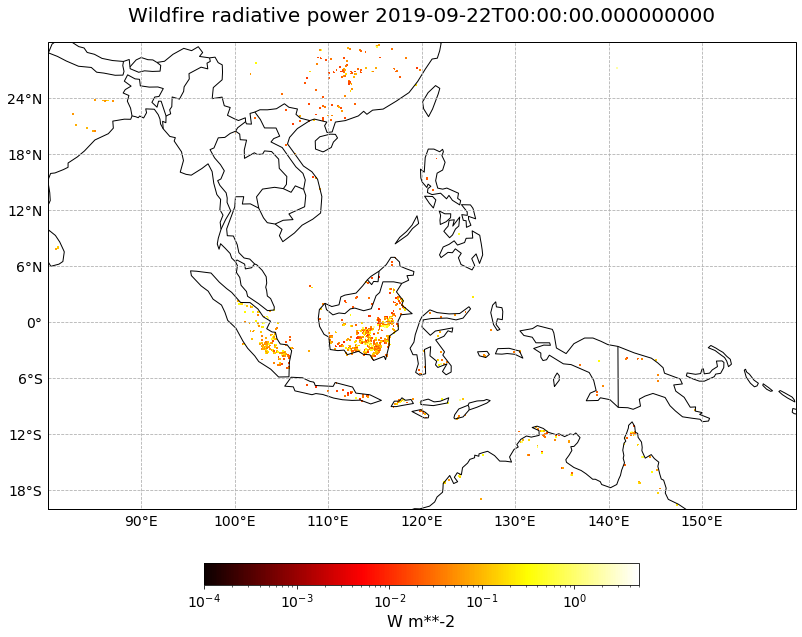

In [10]:
visualize_pcolormesh(frpfire_subset.isel(time=1).data, frpfire_subset.longitude.data, frpfire_subset.latitude.data, ccrs.PlateCarree(), 'hot', unit, longname + ' ' + str(frpfire_subset.isel(time=0).time.data), 0.0001, 5, lonmin, lonmax, latmin, latmax, log=True, set_global=False)
  

<br>

<a href="./15_s5p_tropomi_co.ipynb"><< 15 - S5P TROPOMI CO </a><span style="float:right;"><a href="./31_geff_data_overview.ipynb">31 - GEFF Data Overview >></a></span>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.